In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
import sklearn
import itertools
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import naive_bayes
from sklearn import metrics    
%matplotlib inline

In [2]:
long_weather = pd.read_csv("~/downloads/5024556898730dat.csv", header = 2)
long_weather.head()

,994971,99999,20110101,0000,4,FM-12,,8.3,1,99,...,9.36,9999.9.3,9.37,9.38,999.9.6,9.39,9.40,999.9.8,9.41,Unnamed: 77
0,994971,99999,20110101,100,4,FM-12,,7.7,1,99,...,9,9999.9,9,9,999.9,9,9,999.9,9,NaN
1,994971,99999,20110101,200,4,FM-12,,7.0,1,99,...,9,9999.9,9,9,999.9,9,9,999.9,9,NaN
2,994971,99999,20110101,300,4,FM-12,,7.2,1,99,...,9,9999.9,9,9,999.9,9,9,999.9,9,NaN
3,994971,99999,20110101,400,4,FM-12,,6.1,1,99,...,9,9999.9,9,9,999.9,9,9,999.9,9,NaN
4,994971,99999,20110101,500,4,FM-12,,6.3,1,99,...,9,9999.9,9,9,999.9,9,9,999.9,9,NaN


In [3]:
temp = long_weather.ix[:, 7]
date = long_weather.ix[:, 2]
hour = long_weather.ix[:, 3]

In [4]:
df3 = pd.DataFrame({'date': date, 'hour': hour, 'temp': temp})

In [5]:
df3.head()

,date,hour,temp
0,20110101,100,7.7
1,20110101,200,7.0
2,20110101,300,7.2
3,20110101,400,6.1
4,20110101,500,6.3


In [6]:
df3.date = pd.to_datetime(df3.date, format='%Y%m%d')

In [7]:
df3.head()

,date,hour,temp
0,2011-01-01,100,7.7
1,2011-01-01,200,7.0
2,2011-01-01,300,7.2
3,2011-01-01,400,6.1
4,2011-01-01,500,6.3


In [8]:
df3.hour = df3.hour / 100
df3.tail()

,date,hour,temp
42282,2015-12-01,19,6.3
42283,2015-12-01,20,6.5
42284,2015-12-01,21,6.6
42285,2015-12-01,22,6.7
42286,2015-12-01,23,7.0


In [9]:
hrelec = [
"OI_darthrmwh_iso_4006_20110101_20110214.csv",
"OI_darthrmwh_iso_4006_20110215_20110331.csv",
"OI_darthrmwh_iso_4006_20110401_20110515.csv",
"OI_darthrmwh_iso_4006_20110630_20110630.csv",
"OI_darthrmwh_iso_4006_20110814_20110814.csv",
"OI_darthrmwh_iso_4006_20110814_20110927.csv",
"OI_darthrmwh_iso_4006_20110928_20111110.csv",
"OI_darthrmwh_iso_4006_20111111_20111225.csv",
"OI_darthrmwh_iso_4006_20111226_20111231.csv",
"OI_darthrmwh_iso_4006_20120101_20120214.csv",
"OI_darthrmwh_iso_4006_20120215_20120330.csv",
"OI_darthrmwh_iso_4006_20120331_20120514.csv",
"OI_darthrmwh_iso_4006_20120515_20120628.csv",
"OI_darthrmwh_iso_4006_20120629_20120812.csv",
"OI_darthrmwh_iso_4006_20120813_20120926.csv",
"OI_darthrmwh_iso_4006_20120927_20121109.csv",
"OI_darthrmwh_iso_4006_20121110_20121224.csv",
"OI_darthrmwh_iso_4006_20121225_20121231.csv",
"OI_darthrmwh_iso_4006_20130101_20130214.csv",
"OI_darthrmwh_iso_4006_20130215_20130331.csv",
"OI_darthrmwh_iso_4006_20130401_20130515.csv",
"OI_darthrmwh_iso_4006_20130516_20130629.csv",
"OI_darthrmwh_iso_4006_20130630_20130813.csv",
"OI_darthrmwh_iso_4006_20130714_20130827.csv",
"OI_darthrmwh_iso_4006_20130828_20131011.csv",
"OI_darthrmwh_iso_4006_20131012_20131124.csv",
"OI_darthrmwh_iso_4006_20131125_20131231.csv",
"OI_darthrmwh_iso_4006_20140101_20140214.csv",
"OI_darthrmwh_iso_4006_20140215_20140331.csv",
"OI_darthrmwh_iso_4006_20140401_20140515.csv",
"OI_darthrmwh_iso_4006_20140516_20140629.csv",
"OI_darthrmwh_iso_4006_20140630_20140813.csv",
"OI_darthrmwh_iso_4006_20140814_20140927.csv",
"OI_darthrmwh_iso_4006_20140928_20141110.csv",
"OI_darthrmwh_iso_4006_20141111_20141225.csv",
"OI_darthrmwh_iso_4006_20141226_20150208.csv",
"OI_darthrmwh_iso_4006_20150101_20150214.csv",
"OI_darthrmwh_iso_4006_20150215_20150331.csv",
"OI_darthrmwh_iso_4006_20150401_20150515.csv",
"OI_darthrmwh_iso_4006_20150516_20150629.csv",
"OI_darthrmwh_iso_4006_20150630_20150813.csv",
"OI_darthrmwh_iso_4006_20150814_20150927.csv",
"OI_darthrmwh_iso_4006_20150918_20151101.csv",
"OI_darthrmwh_iso_4006_20151102_20151216.csv"
]

In [121]:
hourly_electric = []
for file in hrelec:
    y = pd.read_csv("~/travis_python/homework/FINAL/FINAL/HourlyElec/{}".format(file), header=6)
    hourly_electric.append(y)
hr_elec = pd.concat(hourly_electric)

In [122]:
hr_elec = hr_elec.drop("H", 1)

In [12]:
hr_elec.head()

,Date,Hour ending,MWH,MWH.1
0,2011-01-01,1,1333.2,1438.0
1,2011-01-01,2,1255.4,1348.0
2,2011-01-01,3,1205.7,1285.7
3,2011-01-01,4,1183.3,1252.1
4,2011-01-01,5,1195.2,1242.5


In [13]:
df3['date'] = pd.to_datetime(df3['date'], format='%d%m%Y')

In [14]:
df3 = df3.set_index("date")

In [16]:
hrmwhp = hr_elec["MWH"]
hrmwh = hr_elec["MWH.1"]

In [18]:
df4 = pd.concat([df3, hr_elec], axis=1)


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [35]:
df3["hour"] = df3["hour"].astype(int)

In [33]:
df3.merge(hrmwh.to_frame(), left_index=True, right_index=True)

TypeError: type object argument after * must be a sequence, not map

In [ ]:
hr_elec = hr_elec.set_index("Date")

In [123]:
hr_elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43076 entries, 0 to 840
Data columns (total 4 columns):
Date           43076 non-null object
Hour ending    43032 non-null float64
MWH            43032 non-null float64
MWH.1          42936 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.6+ MB


In [ ]:
df3.info()

In [ ]:
hr_elec = hr_elec.dropna()

In [ ]:
df3['hour'] = df3['hour'].astype(int)


In [20]:
df3.set_index(pd.to_datetime(df3.index + df3.hour.astype(int)), inplace=True)

In [22]:
df3["MWH"] = hr_elec["MWH"]
df3.head()

ValueError: cannot reindex from a duplicate axis

In [25]:
hr_elec["MWH"]

0      1333.2
1      1255.4
2      1205.7
3      1183.3
4      1195.2
5      1246.8
6      1347.2
7      1430.0
8      1553.7
9      1626.4
10     1648.6
11     1644.8
12     1641.7
13     1621.5
14     1612.3
15     1636.6
16     1831.2
17     1986.0
18     1970.0
19     1911.6
20     1856.4
21     1695.3
22     1553.4
23     1375.0
24     1283.3
25     1202.9
26     1162.8
27     1141.2
28     1149.1
29     1187.2
        ...  
811    1709.2
812    1641.5
813    1558.4
814    1459.5
815    1297.4
816    1199.6
817    1124.7
818    1097.3
819    1087.3
820    1104.0
821    1161.1
822    1234.3
823    1311.4
824    1374.6
825    1471.6
826    1442.3
827    1475.5
828    1447.7
829    1405.1
830    1409.7
831    1516.4
832    1759.0
833    1860.6
834    1793.0
835    1739.2
836    1664.9
837    1544.5
838    1405.2
839    1251.2
840       NaN
Name: MWH, dtype: float64

In [36]:
df3["hour"] = df3["hour"].astype(str)

In [40]:
merged_inner = pd.merge(left=df3,right=hr_elec, left_on='hour', right_on='Date', how="outer")


In [41]:
merged_inner.head()

,hour,temp,Date,Hour ending,MWH,MWH.1
0,1,7.7,NaN,NaN,NaN,NaN
1,1,10.5,NaN,NaN,NaN,NaN
2,1,9.1,NaN,NaN,NaN,NaN
3,1,0.2,NaN,NaN,NaN,NaN
4,1,1.9,NaN,NaN,NaN,NaN


In [42]:
df5 = pd.DataFrame({'date': date, 'hour': hour, 'temp': temp, 'mwhp': hrmwhp, "mwh": hrmwh})

ValueError: cannot reindex from a duplicate axis

In [43]:
type(hrmwh)

pandas.core.series.Series

In [44]:
type(date)

pandas.core.series.Series

In [47]:
df6 = pd.DataFrame([hrmwh, date])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [46]:
df6.head()

AttributeError: 'list' object has no attribute 'head'

In [48]:
df4 = df3.reset_index()
df5 = hr_elec.reset_index()

ValueError: cannot insert hour, already exists

In [51]:
df3.columns.rename(["time", "temp"])

In [58]:
df3.columns = ["time", "temp"]

In [80]:
df4 = df3.reset_index()

In [81]:
df4.columns = ["date", "hour", "temp"]

In [82]:
df4.head()

,date,hour,temp
0,2011-01-01,1,7.7
1,2011-01-01,2,7.0
2,2011-01-01,3,7.2
3,2011-01-01,4,6.1
4,2011-01-01,5,6.3


In [65]:
hr_elec.head()

,Date,Hour ending,MWH,MWH.1
0,2011-01-01,1,1333.2,1438.0
1,2011-01-01,2,1255.4,1348.0
2,2011-01-01,3,1205.7,1285.7
3,2011-01-01,4,1183.3,1252.1
4,2011-01-01,5,1195.2,1242.5


In [69]:
hourly = df4.merge(hr_elec, left_on="date", right_on="Date", how="outer")

In [70]:
hourly

,date,hour,temp,Date,Hour ending,MWH,MWH.1
0,2011-01-01,1,7.7,NaN,NaN,NaN,NaN
1,2011-01-01,2,7.0,NaN,NaN,NaN,NaN
2,2011-01-01,3,7.2,NaN,NaN,NaN,NaN
3,2011-01-01,4,6.1,NaN,NaN,NaN,NaN
4,2011-01-01,5,6.3,NaN,NaN,NaN,NaN
5,2011-01-01,6,6.3,NaN,NaN,NaN,NaN
6,2011-01-01,7,4.5,NaN,NaN,NaN,NaN
7,2011-01-01,8,5.8,NaN,NaN,NaN,NaN
8,2011-01-01,9,5.2,NaN,NaN,NaN,NaN
9,2011-01-01,10,5.2,NaN,NaN,NaN,NaN


In [71]:
df4["date"] = df4["date"].astype(str)

In [72]:
df4["hour"] = df4["hour"].astype(str)

In [73]:
df4["datetime"] = df4.date + df4.hour

In [76]:
df4.tail()

,date,hour,temp,datetime
42282,2015-11-30T19:00:00.000000019-0500,19,6.3,2015-11-30T19:00:00.000000019-050019
42283,2015-11-30T19:00:00.000000020-0500,20,6.5,2015-11-30T19:00:00.000000020-050020
42284,2015-11-30T19:00:00.000000021-0500,21,6.6,2015-11-30T19:00:00.000000021-050021
42285,2015-11-30T19:00:00.000000022-0500,22,6.7,2015-11-30T19:00:00.000000022-050022
42286,2015-11-30T19:00:00.000000023-0500,23,7.0,2015-11-30T19:00:00.000000023-050023


In [78]:
df4 = df3

In [85]:
pd.to_datetime(df4.date, format="%Y%m%d%H")

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
5       2011-01-01
6       2011-01-01
7       2011-01-01
8       2011-01-01
9       2011-01-01
10      2011-01-01
11      2011-01-01
12      2011-01-01
13      2011-01-01
14      2011-01-01
15      2011-01-01
16      2011-01-01
17      2011-01-01
18      2011-01-01
19      2011-01-01
20      2011-01-01
21      2011-01-01
22      2011-01-01
23      2011-01-02
24      2011-01-02
25      2011-01-02
26      2011-01-02
27      2011-01-02
28      2011-01-02
29      2011-01-02
           ...    
42257   2015-11-30
42258   2015-11-30
42259   2015-11-30
42260   2015-11-30
42261   2015-11-30
42262   2015-11-30
42263   2015-12-01
42264   2015-12-01
42265   2015-12-01
42266   2015-12-01
42267   2015-12-01
42268   2015-12-01
42269   2015-12-01
42270   2015-12-01
42271   2015-12-01
42272   2015-12-01
42273   2015-12-01
42274   2015-12-01
42275   2015-12-01
42276   2015-12-01
42277   2015-12-01
42278   2015

In [93]:
hr_elec.head()

,Date,Hour ending,MWH,MWH.1
0,2011-01-01,1,1333.2,1438.0
1,2011-01-01,2,1255.4,1348.0
2,2011-01-01,3,1205.7,1285.7
3,2011-01-01,4,1183.3,1252.1
4,2011-01-01,5,1195.2,1242.5


In [124]:
hr_elec.columns = ["date", "hour", "MWHp", "MWH"]

In [104]:
hr_elec["datetime"] = hr_elec.date.astype(str) + hr_elec.hour.astype(str)

In [105]:
hr_elec.head(20)

,date,hour,MWHp,MWH,datetime
0,2011-01-01,1,1333.2,1438.0,2011-01-011.0
1,2011-01-01,2,1255.4,1348.0,2011-01-012.0
2,2011-01-01,3,1205.7,1285.7,2011-01-013.0
3,2011-01-01,4,1183.3,1252.1,2011-01-014.0
4,2011-01-01,5,1195.2,1242.5,2011-01-015.0
5,2011-01-01,6,1246.8,1264.3,2011-01-016.0
6,2011-01-01,7,1347.2,1310.4,2011-01-017.0
7,2011-01-01,8,1430.0,1343.7,2011-01-018.0
8,2011-01-01,9,1553.7,1431.8,2011-01-019.0
9,2011-01-01,10,1626.4,1513.8,2011-01-0110.0


In [107]:
hr_elec["day"] = pd.to_datetime(hr_elec.date, infer_datetime_format=True)

In [117]:
hr_elec.head()

,date,hour,MWHp,MWH,datetime,day
0,2011-01-01,1,1333,1438,2011-01-011.0,2011-01-01
1,2011-01-01,2,1255,1348,2011-01-012.0,2011-01-01
2,2011-01-01,3,1205,1285,2011-01-013.0,2011-01-01
3,2011-01-01,4,1183,1252,2011-01-014.0,2011-01-01
4,2011-01-01,5,1195,1242,2011-01-015.0,2011-01-01


In [115]:
hr_elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42936 entries, 0 to 743
Data columns (total 6 columns):
date        42936 non-null object
hour        42936 non-null float64
MWHp        42936 non-null int64
MWH         42936 non-null int64
datetime    42936 non-null object
day         42936 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 2.3+ MB


In [116]:
hr_elec["MWHp"] = hr_elec["MWHp"].astype(float)
hr_elec["MWH"] = hr_elec["MWH"].astype(float)

/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [118]:
hr_elec["day2"] = pd.to_datetime(hr_elec.day)

/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
hr_elec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42936 entries, 0 to 743
Data columns (total 7 columns):
date        42936 non-null object
hour        42936 non-null float64
MWHp        42936 non-null float64
MWH         42936 non-null float64
datetime    42936 non-null object
day         42936 non-null object
day2        42936 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.6+ MB


In [125]:
hr_elec.to_csv("hourly_electric.csv")

In [141]:
a = pd.read_csv("~/travis_python/homework/FINAL/FINAL/hourly_electric.csv",
               parse_dates={'timestamp': ['date','hour']},
               usecols=['date', 'hour'])

In [144]:
b = pd.to_datetime(a.timestamp, infer_datetime_format=True)

In [148]:
b.columns=["timestamp"]

In [149]:
hourly = hr_elec.merge(b, left_on="date", right_on="timestamp")

KeyError: 'timestamp'

In [159]:
hourly.head()

,timestamp,date,hour,MWHp,MWH
0,2011-01-01 1.0,2011-01-01,1,1333.2,1438.0
1,2011-01-01 2.0,2011-01-01,2,1255.4,1348.0
2,2011-01-01 3.0,2011-01-01,3,1205.7,1285.7
3,2011-01-01 4.0,2011-01-01,4,1183.3,1252.1
4,2011-01-01 5.0,2011-01-01,5,1195.2,1242.5


In [160]:
hourly["datetime"] = pd.to_datetime(hourly.timestamp, infer_datetime_format=True)

In [162]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43076 entries, 0 to 840
Data columns (total 6 columns):
timestamp    43076 non-null object
date         43076 non-null object
hour         43032 non-null float64
MWHp         43032 non-null float64
MWH          42936 non-null float64
datetime     43076 non-null object
dtypes: float64(3), object(3)
memory usage: 2.3+ MB


In [163]:
len(df4)

42287

In [165]:
df3.to_csv("hourly_weather.csv")

In [183]:
newdf3 = pd.read_csv("/Users/travisknop/travis_python/homework/FINAL/FINAL/hourly_weather_electric.csv")

In [187]:
newdf3 = newdf3.dropna()
newdf3["hour.1"] = newdf3["hour.1"].astype(int)
newdf3.head()

,hour,time,temp,date,hour.1,MWHp,MWH
0,2011-01-01,1,7.7,2011-01-01,1,1333.2,1438.0
1,2011-01-01,2,7.0,2011-01-01,2,1255.4,1348.0
2,2011-01-01,3,7.2,2011-01-01,3,1205.7,1285.7
3,2011-01-01,4,6.1,2011-01-01,4,1183.3,1252.1
4,2011-01-01,5,6.3,2011-01-01,5,1195.2,1242.5


In [188]:
newdf3["temptime"] = newdf3.hour.astype(str) + "-" + newdf3.time.astype(str)

In [189]:
newdf3["electime"]= newdf3.date.astype(str) + "-" + newdf3["hour.1"].astype(str)

In [190]:
newdf4 = pd.concat([newdf3['temptime'], newdf3['temp'], newdf3['electime'], newdf3['MWH'], newdf3['MWHp']], axis=1, keys=['temptime', 'temp', 'electime', 'MWH', 'MWHp'])

In [191]:
newdf4

,temptime,temp,electime,MWH,MWHp
0,2011-01-01-1,7.7,2011-01-01-1,1438.0,1333.2
1,2011-01-01-2,7.0,2011-01-01-2,1348.0,1255.4
2,2011-01-01-3,7.2,2011-01-01-3,1285.7,1205.7
3,2011-01-01-4,6.1,2011-01-01-4,1252.1,1183.3
4,2011-01-01-5,6.3,2011-01-01-5,1242.5,1195.2
5,2011-01-01-6,6.3,2011-01-01-6,1264.3,1246.8
6,2011-01-01-7,4.5,2011-01-01-7,1310.4,1347.2
7,2011-01-01-8,5.8,2011-01-01-8,1343.7,1430.0
8,2011-01-01-9,5.2,2011-01-01-9,1431.8,1553.7
9,2011-01-01-10,5.2,2011-01-01-10,1513.8,1626.4


In [192]:
newdf3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42244 entries, 0 to 42286
Data columns (total 9 columns):
hour        42244 non-null object
time        42244 non-null int64
temp        42244 non-null float64
date        42244 non-null object
hour.1      42244 non-null int64
MWHp        42244 non-null float64
MWH         42244 non-null float64
temptime    42244 non-null object
electime    42244 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 3.2+ MB


In [216]:
newdf4["temptime2"] = pd.to_datetime(newdf4.temptime)

In [201]:
newdf4["electime2"] = pd.to_datetime(newdf4.electime, infer_datetime_format=True)

In [203]:
newdf4["electime3"] = newdf4["electime2"] + 5m

SyntaxError: invalid syntax (<ipython-input-203-70577e984faf>, line 1)

In [204]:
newdf4.head()

,temptime,temp,electime,MWH,MWHp,electime2,temptime2
0,2011-01-01-1,7.7,2011-01-01-1,1438.0,1333.2,2011-01-01-1,2011-01-01-1
1,2011-01-01-2,7.0,2011-01-01-2,1348.0,1255.4,2011-01-01-2,2011-01-01-2
2,2011-01-01-3,7.2,2011-01-01-3,1285.7,1205.7,2011-01-01-3,2011-01-01-3
3,2011-01-01-4,6.1,2011-01-01-4,1252.1,1183.3,2011-01-01-4,2011-01-01-4
4,2011-01-01-5,6.3,2011-01-01-5,1242.5,1195.2,2011-01-01-5,2011-01-01-5


In [213]:
newdf4["electime3"] = newdf4["electime2"] + pd.Timedelta(minutes=5)

TypeError: unsupported operand type(s) for +: 'numpy.ndarray' and 'Timedelta'

In [206]:
newdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42244 entries, 0 to 42286
Data columns (total 7 columns):
temptime     42244 non-null object
temp         42244 non-null float64
electime     42244 non-null object
MWH          42244 non-null float64
MWHp         42244 non-null float64
electime2    42244 non-null object
temptime2    42244 non-null object
dtypes: float64(3), object(4)
memory usage: 2.6+ MB


In [208]:
from datetime import timedelta

In [218]:
type(newdf4.temptime2[2])

str

In [219]:
newdf4["electime3"] = pd.to_datetime(pd.Series(newdf4["electime2"]))

In [220]:
newdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42244 entries, 0 to 42286
Data columns (total 8 columns):
temptime     42244 non-null object
temp         42244 non-null float64
electime     42244 non-null object
MWH          42244 non-null float64
MWHp         42244 non-null float64
electime2    42244 non-null object
temptime2    42244 non-null object
electime3    42244 non-null object
dtypes: float64(3), object(5)
memory usage: 2.9+ MB


In [222]:
type(newdf4["electime3"][3])

str

In [224]:
newdf4["electime3"] = pd.to_datetime(pd.Series(newdf3["date"]))

In [225]:
newdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42244 entries, 0 to 42286
Data columns (total 8 columns):
temptime     42244 non-null object
temp         42244 non-null float64
electime     42244 non-null object
MWH          42244 non-null float64
MWHp         42244 non-null float64
electime2    42244 non-null object
temptime2    42244 non-null object
electime3    42244 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.9+ MB


In [240]:
newdf4["electime3h"] = pd.to_datetime(pd.Series(newdf3["hour.1"]), format="hour")

ValueError: time data 1 does not match format 'hour' (match)

In [228]:
newdf4.head()

,temptime,temp,electime,MWH,MWHp,electime2,temptime2,electime3,electime3h
0,2011-01-01-1,7.7,2011-01-01-1,1438.0,1333.2,2011-01-01-1,2011-01-01-1,2011-01-01,1970-01-01 00:00:00.000000001
1,2011-01-01-2,7.0,2011-01-01-2,1348.0,1255.4,2011-01-01-2,2011-01-01-2,2011-01-01,1970-01-01 00:00:00.000000002
2,2011-01-01-3,7.2,2011-01-01-3,1285.7,1205.7,2011-01-01-3,2011-01-01-3,2011-01-01,1970-01-01 00:00:00.000000003
3,2011-01-01-4,6.1,2011-01-01-4,1252.1,1183.3,2011-01-01-4,2011-01-01-4,2011-01-01,1970-01-01 00:00:00.000000004
4,2011-01-01-5,6.3,2011-01-01-5,1242.5,1195.2,2011-01-01-5,2011-01-01-5,2011-01-01,1970-01-01 00:00:00.000000005


In [238]:
newdf4["electime3h"] = pd.to_datetime(newdf3["hour.1"], format='hour')

ValueError: time data 1 does not match format 'hour' (match)

In [236]:
def combine64(years, months=1, days=1, weeks=None, hours=None, minutes=None,
              seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)

In [242]:
newdf4["electime3h"] = newdf3["hour.1"].astype("<m8[h]")

In [247]:
newdf4.dropna
type(newdf4.electime3h[4])

pandas.tslib.Timedelta

In [248]:
newdf4["electime5"] = newdf4["electime3"]+ newdf4["electime3h"]

In [251]:
newdf4.head()

,temptime,temp,electime,MWH,MWHp,electime2,temptime2,electime3,electime3h,electime5
0,2011-01-01-1,7.7,2011-01-01-1,1438.0,1333.2,2011-01-01-1,2011-01-01-1,2011-01-01,01:00:00,2011-01-01 01:00:00
1,2011-01-01-2,7.0,2011-01-01-2,1348.0,1255.4,2011-01-01-2,2011-01-01-2,2011-01-01,02:00:00,2011-01-01 02:00:00
2,2011-01-01-3,7.2,2011-01-01-3,1285.7,1205.7,2011-01-01-3,2011-01-01-3,2011-01-01,03:00:00,2011-01-01 03:00:00
3,2011-01-01-4,6.1,2011-01-01-4,1252.1,1183.3,2011-01-01-4,2011-01-01-4,2011-01-01,04:00:00,2011-01-01 04:00:00
4,2011-01-01-5,6.3,2011-01-01-5,1242.5,1195.2,2011-01-01-5,2011-01-01-5,2011-01-01,05:00:00,2011-01-01 05:00:00


In [253]:
newdf4["temptime3h"] = newdf3["time"].astype("<m8[h]")
newdf4["temptime3"] = pd.to_datetime(newdf3["hour"])

In [254]:
newdf4.head()

,temptime,temp,electime,MWH,MWHp,electime2,temptime2,electime3,electime3h,electime5,temptime3h,temptime3
0,2011-01-01-1,7.7,2011-01-01-1,1438.0,1333.2,2011-01-01-1,2011-01-01-1,2011-01-01,01:00:00,2011-01-01 01:00:00,01:00:00,2011-01-01
1,2011-01-01-2,7.0,2011-01-01-2,1348.0,1255.4,2011-01-01-2,2011-01-01-2,2011-01-01,02:00:00,2011-01-01 02:00:00,02:00:00,2011-01-01
2,2011-01-01-3,7.2,2011-01-01-3,1285.7,1205.7,2011-01-01-3,2011-01-01-3,2011-01-01,03:00:00,2011-01-01 03:00:00,03:00:00,2011-01-01
3,2011-01-01-4,6.1,2011-01-01-4,1252.1,1183.3,2011-01-01-4,2011-01-01-4,2011-01-01,04:00:00,2011-01-01 04:00:00,04:00:00,2011-01-01
4,2011-01-01-5,6.3,2011-01-01-5,1242.5,1195.2,2011-01-01-5,2011-01-01-5,2011-01-01,05:00:00,2011-01-01 05:00:00,05:00:00,2011-01-01


In [255]:
newdf4["temptime5"] = newdf4["temptime3"]+ newdf4["temptime3h"]

In [257]:
newdf4.to_csv("hour_weather_elec_ugly.csv")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [258]:
newdf4.drop("isnan")

ValueError: labels ['isnan'] not contained in axis

In [260]:
newdf4.loc[0, ]

temptime             2011-01-01-1
temp                          7.7
electime             2011-01-01-1
MWH                          1438
MWHp                       1333.2
electime2            2011-01-01-1
temptime2            2011-01-01-1
electime3     2011-01-01 00:00:00
electime3h        0 days 01:00:00
electime5     2011-01-01 01:00:00
temptime3h        0 days 01:00:00
temptime3     2011-01-01 00:00:00
temptime5     2011-01-01 01:00:00
Name: 0, dtype: object

In [264]:
newdf5 = newdf4

In [274]:
newdf5 = newdf5.columns.drop("temptime", "electime")
newdf5 = newdf5.columns.drop("electime2", "temptime2")
newdf5 = newdf5.columns.drop("electime3h", "temptime3h")
newdf5 = newdf5.columns.drop("electime3", "temptime3")

AttributeError: 'Index' object has no attribute 'columns'

In [276]:
newdf5.index()

AttributeError: 'Index' object has no attribute 'index'

In [277]:
newdf5.head()

AttributeError: 'Index' object has no attribute 'head'

In [278]:
newdf4.head()

,temptime,temp,electime,MWH,MWHp,electime2,temptime2,electime3,electime3h,electime5,temptime3h,temptime3,temptime5
0,2011-01-01-1,7.7,2011-01-01-1,1438.0,1333.2,2011-01-01-1,2011-01-01-1,2011-01-01,01:00:00,2011-01-01 01:00:00,01:00:00,2011-01-01,2011-01-01 01:00:00
1,2011-01-01-2,7.0,2011-01-01-2,1348.0,1255.4,2011-01-01-2,2011-01-01-2,2011-01-01,02:00:00,2011-01-01 02:00:00,02:00:00,2011-01-01,2011-01-01 02:00:00
2,2011-01-01-3,7.2,2011-01-01-3,1285.7,1205.7,2011-01-01-3,2011-01-01-3,2011-01-01,03:00:00,2011-01-01 03:00:00,03:00:00,2011-01-01,2011-01-01 03:00:00
3,2011-01-01-4,6.1,2011-01-01-4,1252.1,1183.3,2011-01-01-4,2011-01-01-4,2011-01-01,04:00:00,2011-01-01 04:00:00,04:00:00,2011-01-01,2011-01-01 04:00:00
4,2011-01-01-5,6.3,2011-01-01-5,1242.5,1195.2,2011-01-01-5,2011-01-01-5,2011-01-01,05:00:00,2011-01-01 05:00:00,05:00:00,2011-01-01,2011-01-01 05:00:00


In [280]:
newdf4.drop("temptime", 1)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [281]:
a = [newdf4.temptime5,
newdf4.electime5,
newdf4.temp,
newdf4.MWH,
newdf4.MWHp]

In [284]:
x = pd.concat(a, axis=1)

In [287]:
x.to_csv("hourly_weather_elec_prettier.csv")

In [286]:
tempdata = [newdf4.temptime5,newdf4.temp]

elecdata = [newdf4.electime5, newdf4.MWH, newdf4.MWHp]


In [288]:
tt = pd.concat(tempdata, axis=1)
ee = pd.concat(elecdata, axis=1)

In [291]:
ee = ee.set_index("electime5")
tt = tt.set_index("temptime5")


In [292]:
tt.head()

,temp
temptime5,
2011-01-01 01:00:00,7.7
2011-01-01 02:00:00,7.0
2011-01-01 03:00:00,7.2
2011-01-01 04:00:00,6.1
2011-01-01 05:00:00,6.3


In [293]:
et = tt.merge(ee, left_index=True, right_index=True)

In [294]:
et

,temp,MWH,MWHp
2011-01-01 01:00:00,7.7,1438.0,1333.2
2011-01-01 02:00:00,7.0,1348.0,1255.4
2011-01-01 03:00:00,7.2,1285.7,1205.7
2011-01-01 04:00:00,6.1,1252.1,1183.3
2011-01-01 05:00:00,6.3,1242.5,1195.2
2011-01-01 06:00:00,6.3,1264.3,1246.8
2011-01-01 07:00:00,4.5,1310.4,1347.2
2011-01-01 08:00:00,5.8,1343.7,1430.0
2011-01-01 09:00:00,5.2,1431.8,1553.7
2011-01-01 10:00:00,5.2,1513.8,1626.4


In [295]:
tt.loc["2015-05-05 20:00:00"]

temp    18.8
Name: 2015-05-05 20:00:00, dtype: float64

In [296]:
ee.loc["2015-05-05 20:00:00"]

,MWH,MWHp
electime5,,
2015-05-05 20:00:00,1710.3,1629


In [297]:
et.to_csv("Hourly_Temp_MWH_final.csv")

In [300]:
et.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41492 entries, 2011-01-01 01:00:00 to 2015-11-04 04:00:00
Data columns (total 3 columns):
temp    41492 non-null float64
MWH     41492 non-null float64
MWHp    41492 non-null float64
dtypes: float64(3)
memory usage: 1.3 MB


In [301]:
ettrain = et[:-10000]

In [302]:
ettrain.head()

,temp,MWH,MWHp
2011-01-01 01:00:00,7.7,1438.0,1333.2
2011-01-01 02:00:00,7.0,1348.0,1255.4
2011-01-01 03:00:00,7.2,1285.7,1205.7
2011-01-01 04:00:00,6.1,1252.1,1183.3
2011-01-01 05:00:00,6.3,1242.5,1195.2


In [303]:
ettest = et[-10000:]
ettest.head()

,temp,MWH,MWHp
2014-10-20 11:00:00,5.0,1624.1,1587.1
2014-10-20 12:00:00,4.8,1613.5,1558.3
2014-10-20 13:00:00,6.8,1584.0,1544.4
2014-10-20 14:00:00,7.7,1578.4,1517.8
2014-10-20 15:00:00,9.1,1576.7,1515.2


In [338]:
traintemp = ettrain[["temp"]]
trainMWH = ettrain.MWH
testtemp = ettest[["temp"]]
testMWH = ettest.MWH

In [328]:
gnb1 = naive_bayes.GaussianNB()
gnb1.fit(
    traintemp, 
    ettrain.MWH)


ValueError: Unknown label type: array([  874.9,   876.9,   885.3, ...,  3608.6,  3627.5,  3632.3])

In [310]:
type(trainMWH)

pandas.core.series.Series

In [341]:
lin1 = LinearRegression()
lin1.fit(traintemp, trainMWH)
predMWH = lin1.predict(testtemp)

In [342]:
metrics.mean_absolute_error(testMWH, predMWH)

302.33727056489442

In [343]:
metrics.mean_absolute_error(testMWH, ettest.MWHp)

66.251199999999997

In [345]:
ettest["predMWH"] = predMWH

/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


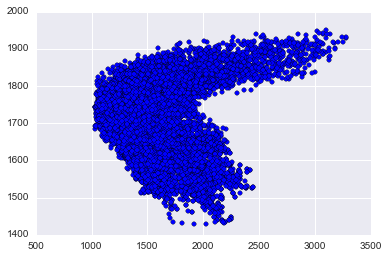

In [350]:
plt.scatter(ettest.MWH, ettest.predMWH)

In [352]:
predvmwh = ettest[["MWH", "predMWH"]]

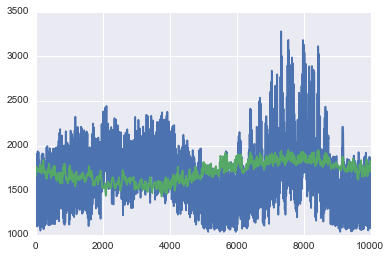

In [353]:
plt.plot(predvmwh)

In [355]:
hr_elec.to_csv("Hr_Elec_2011_2015.csv")

In [356]:
hr_elec.head()

,date,hour,MWHp,MWH
0,2011-01-01,1,1333.2,1438.0
1,2011-01-01,2,1255.4,1348.0
2,2011-01-01,3,1205.7,1285.7
3,2011-01-01,4,1183.3,1252.1
4,2011-01-01,5,1195.2,1242.5
